## **3° & 4° Practice** - Dimension Reduction using PCA(Principal Components Analysis), Sammon & Autoencoders
* November 7°, 2024
#### ESCOM - IPN: *Analitics & Data Visualization*

#### *B.S. in Data Science* - 5AV1
> Sánchez García Miguel Alexander

#### **0° Introduction**

> Make sure you have installed ipymlp package, if not run this command on your terminal to install it :
**pip install ipympl**

Dataset get from:

> https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic 

**a.** First of all, we need to **import** all the **libraries** we are going to use

In [2]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Circle
import seaborn as sns

# For PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances

# For Autoencoder
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.models import Model, Sequential

**b.** We **import** the data

In [3]:
# Step 1: Open the file
with open('wdbc.data', 'r') as file:
    # Step 2: Read the contents of the file
    data = file.read()

# Step 3: Convert the file contents to a list of rows
rows = [line.split(',') for line in data.splitlines()]

# Step 4: Convert the list of rows to a DataFrame
wdbc = pd.DataFrame(rows)

**c.** We need to change all **dimensions names & datatypes** using the website

In [4]:
# Define list of new dimension names
variable_names = [
    "ID",
    "Diagnosis",
    "radius1",
    "texture1",
    "perimeter1",
    "area1",
    "smoothness1",
    "compactness1",
    "concavity1",
    "concave_points1",
    "symmetry1",
    "fractal_dimension1",
    "radius2",
    "texture2",
    "perimeter2",
    "area2",
    "smoothness2",
    "compactness2",
    "concavity2",
    "concave_points2",
    "symmetry2",
    "fractal_dimension2",
    "radius3",
    "texture3",
    "perimeter3",
    "area3",
    "smoothness3",
    "compactness3",
    "concavity3",
    "concave_points3",
    "symmetry3",
    "fractal_dimension3"
]

# Change dataframe column names
wdbc.columns = variable_names

# Change data types of columns except ID & Diagnosis
for column in wdbc.columns[2:]:
    wdbc[column] = pd.to_numeric(wdbc[column], errors='coerce')

#### **1° EDA (Exploratory Data Analysis)**

##### *General Data*

**a.** Let´s check the **dimensions** of the dataset

In [5]:
print('Rows: ' + str(wdbc.shape[0]))
print('Columns: ' + str(wdbc.shape[1]))

Rows: 569
Columns: 32


**b.** Check the first **10 rows**

In [6]:
wdbc.head(10)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


**c.** Get the **info** of the dataset

In [7]:
wdbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    object 
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

##### *Numeric Analysis*

**d.** **Describing** the dataset

In [8]:
wdbc.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**e.** Let´s check the **percentage of the null values** for each dimension

In [9]:
wdbc.isnull().sum() / wdbc.shape[0] * 100

ID                    0.0
Diagnosis             0.0
radius1               0.0
texture1              0.0
perimeter1            0.0
area1                 0.0
smoothness1           0.0
compactness1          0.0
concavity1            0.0
concave_points1       0.0
symmetry1             0.0
fractal_dimension1    0.0
radius2               0.0
texture2              0.0
perimeter2            0.0
area2                 0.0
smoothness2           0.0
compactness2          0.0
concavity2            0.0
concave_points2       0.0
symmetry2             0.0
fractal_dimension2    0.0
radius3               0.0
texture3              0.0
perimeter3            0.0
area3                 0.0
smoothness3           0.0
compactness3          0.0
concavity3            0.0
concave_points3       0.0
symmetry3             0.0
fractal_dimension3    0.0
dtype: float64

##### *Visual Analysis*

In [10]:
# Set default plot color to black
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['black'])

**f.** Select the six dimesions with the **highest variance** and show them with **bloxplots**

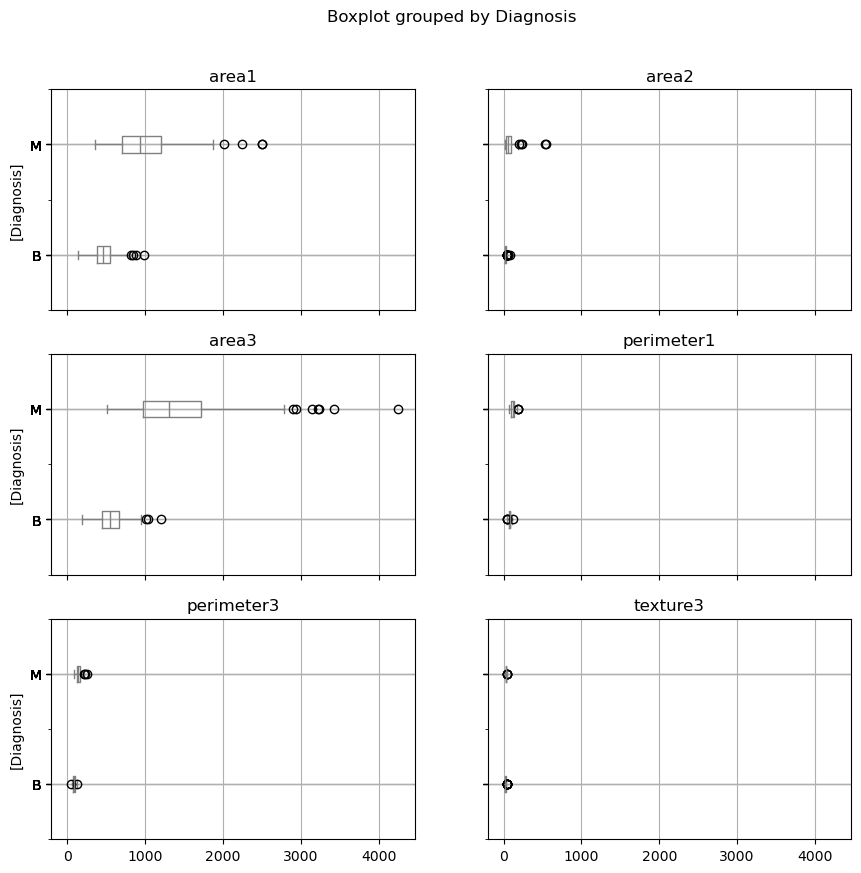

In [11]:
# Select the six columns with the highest variance
wdbc_variance = wdbc.iloc[:, 2:].var().sort_values(ascending=False).head(6)

wdbc_variance_names = wdbc_variance.index.tolist()
wdbc_variance_names.append('Diagnosis')

# Show the boxplot of the six columns
wdbc[wdbc_variance_names].boxplot(by='Diagnosis', figsize=(10, 10), color='gray', vert=False)
plt.show()

#### **2° Data Transformation**

**g.** **Standardize** the dataset

In [12]:
# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Fit and transform the data
standardized_data = standard_scaler.fit_transform(wdbc.iloc[:, 2:])

# Convert the result back to a DataFrame
wdbc_standardized = pd.DataFrame(standardized_data, columns=wdbc.columns[2:])

# Add the ID and Diagnosis columns back to the DataFrame
wdbc_standardized = pd.concat([wdbc['Diagnosis'], wdbc_standardized], axis=1)

**h.** Now repeat step **2 - f**

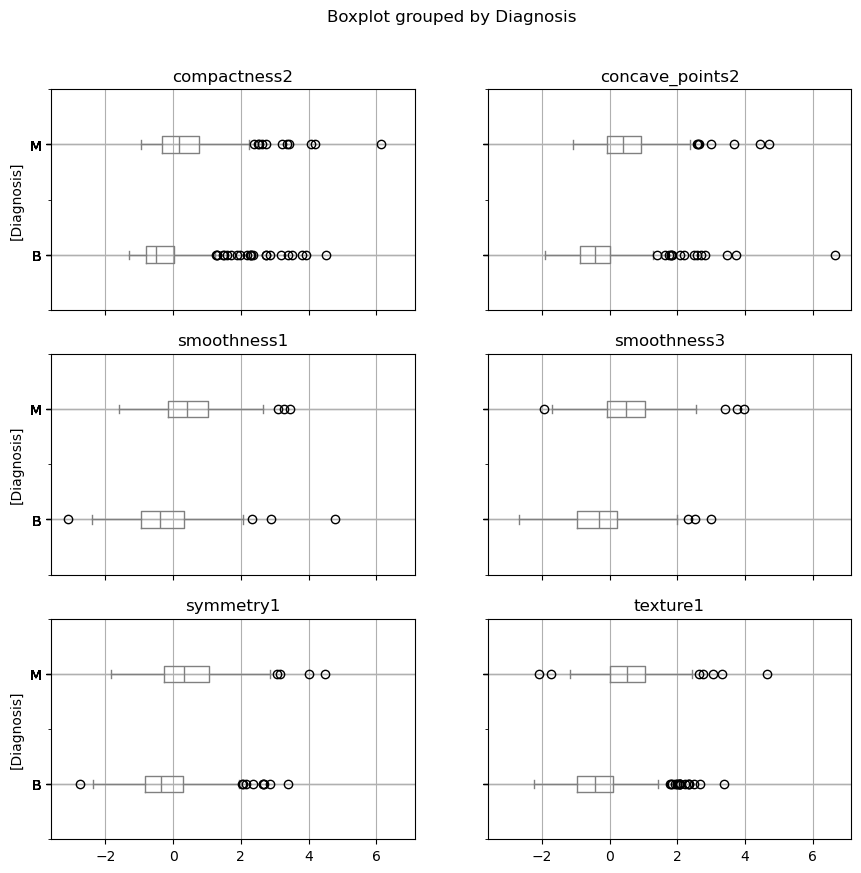

In [13]:
# Select the six columns with the highest variance
wdbc_variance_standardized = wdbc_standardized.iloc[:, 2:].var().sort_values(ascending=False).head(6)

wdbc_variance_standardized_names = wdbc_variance_standardized.index.tolist()
wdbc_variance_standardized_names.append('Diagnosis')

# Show the boxplot of the six columns
wdbc_standardized[wdbc_variance_standardized_names].boxplot(by='Diagnosis', figsize=(10, 10), color='gray', vert=False)
plt.show()

#### **3° PCA**

##### **a)** Perform a 3D PCA

* Training the model

In [14]:
# # Initialize the PCA for 3 components
pca = PCA(n_components=3)

# # Sepatate the standardized data into features and target
x = wdbc_standardized.iloc[:, 1:]
y = wdbc_standardized['Diagnosis']

# # Fit and transform the standardized data
pca_features = pca.fit_transform(x)

* Perform the 3D plot

In [15]:
%matplotlib widget

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get data for the three principal components
x_data = pca_features[:, 0]
y_data = pca_features[:, 1]
z_data = pca_features[:, 2]

# 3D scatter plot
ax.scatter(x_data, y_data, z_data, c=y.map({'M': 'black', 'B': 'gray'}))

# Add x, y and z axis lines as vectors
# ax.quiver(0, 0, 0, 10, 0, 0, color='black', arrow_length_ratio=0.1)
# ax.quiver(0, 0, 0, 0, 10, 0, color='black', arrow_length_ratio=0.1)
# ax.quiver(0, 0, 0, 0, 0, 10, color='black', arrow_length_ratio=0.1)

# Add title
ax.set_title('3D scatter plot of the first three principal components')

# Add labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

RuntimeError: 'widget is not a recognised GUI loop or backend name

##### **b)** Variance Table

In [16]:
# Set the PCA components to 10
pca_10 = PCA(n_components=10)
pca_10.fit(x)

pca_features_10 = pca_10.fit_transform(x)

# Get the explained variance ratio for each component
explained_variance_10 = pca_10.explained_variance_ratio_

# Create a DataFrame with the explained variance
explained_variance_df_10 = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(10)],
    'Explained Variance': explained_variance_10
})

# Show the explained variance DataFrame
explained_variance_df_10

,Principal Component,Explained Variance
0,PC1,0.442720
1,PC2,0.189712
2,PC3,0.093932
3,PC4,0.066021
4,PC5,0.054958
5,PC6,0.040245
6,PC7,0.022507
7,PC8,0.015887
8,PC9,0.013896
9,PC10,0.011690


##### **c)** Bar Plot for the Explained Variance

* Get the explained variance of the original PCA

In [17]:
# Get the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame with the explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(3)],
    'Explained Variance': explained_variance
})

# Show the explained variance DataFrame
explained_variance_df

,Principal Component,Explained Variance
0,PC1,0.442720
1,PC2,0.189712
2,PC3,0.093932


* Plot Scree plot

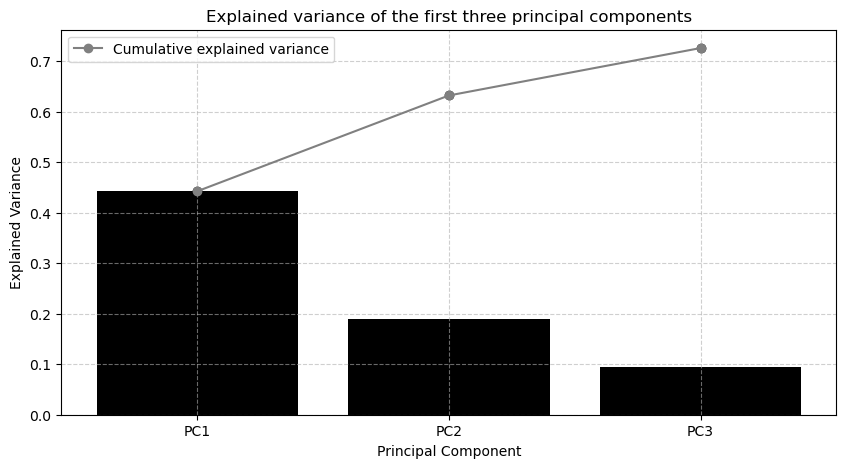

In [18]:
plt.figure(figsize=(10, 5))

# Bar plot of the explained variance
sns.barplot(x='Principal Component', y='Explained Variance', data=explained_variance_df, color='black')

# Add cumulative explained variance
plt.plot(np.cumsum(explained_variance), color='gray', marker='o', label='Cumulative explained variance')

# Add dots for the cumulative explained variance
plt.scatter(range(3), np.cumsum(explained_variance), color='black')

# Add grid
plt.grid(linestyle='--', alpha=0.6)

# Add title
plt.title('Explained variance of the first three principal components')

# Add legend
plt.legend(loc='upper left')

plt.show()

##### **d)** Circle Plot

* Train the PCA model for 2 components

In [19]:
# Set the PCA components to 2
pca_2 = PCA(n_components=2)

pca_features_2 = pca_2.fit_transform(x)

* Plot the Correlation Circle Graph

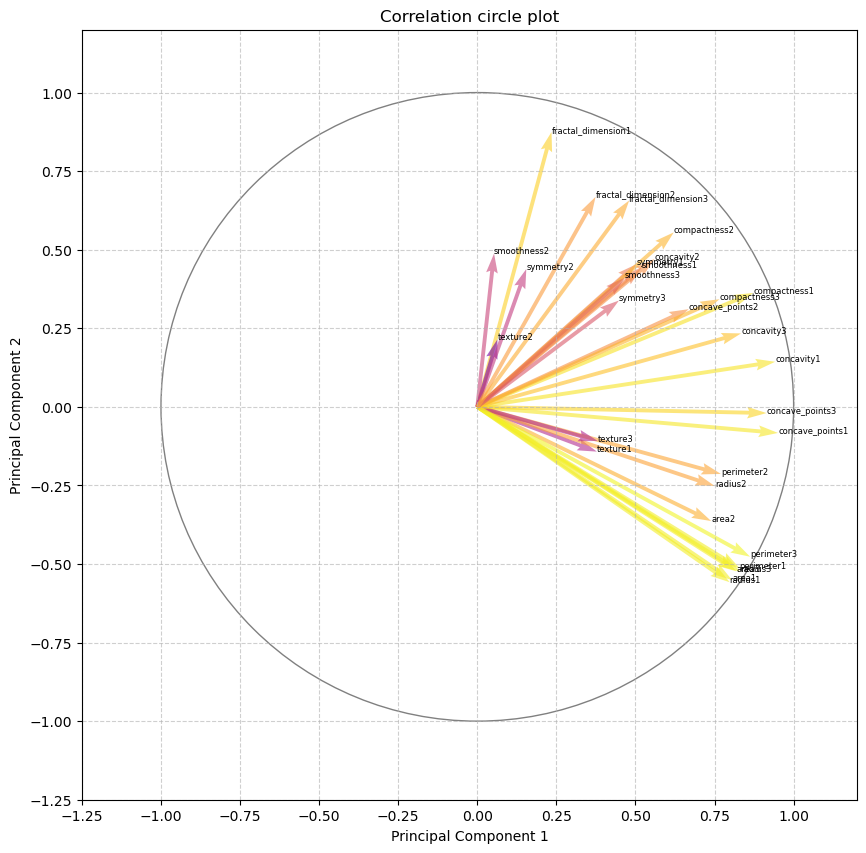

In [20]:
# Set coordinates to an empty list
coordinates = []

# Set euclidean distances to an empty list
euclidean_distances_list = []

# Loop through the original features
for i in range(x.shape[1]):
    corr1 = np.corrcoef(x.iloc[:, i].tolist(), pca_features_2[:, 0])[0, 1]
    corr2 = np.corrcoef(x.iloc[:, i].tolist(), pca_features_2[:, 1])[0, 1]
    coordinates.append((corr1, corr2))
    euclidean_distances_list.append(np.sqrt(corr1 ** 2 + corr2 ** 2))

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot a circle with a radius of 1
circle = Circle((0, 0), 1, color='gray', fill=False)
ax.add_patch(circle)

# Set a color map using the euclidean distances
colors = cm.plasma(euclidean_distances_list)

# Plot all the coordinates as vectors with a color gradient
for i, (corr1, corr2) in enumerate(coordinates):
    ax.quiver(0, 0, corr1, corr2, angles='xy', scale_units='xy', scale=1, color=colors[i], alpha=0.6, width=0.005) 
    ax.text(corr1, corr2, x.columns[i], fontsize=6)

# Set the x and y limits
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

# Set x and y ticks
plt.xticks(np.arange(-1.25, 1.25, 0.25))
plt.yticks(np.arange(-1.25, 1.25, 0.25))

# Add a grid
plt.grid(linestyle='--', alpha=0.6)

# Add labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add title
plt.title('Correlation circle plot')

plt.show()


##### **e)** New 3D Plot for 2 components PCA

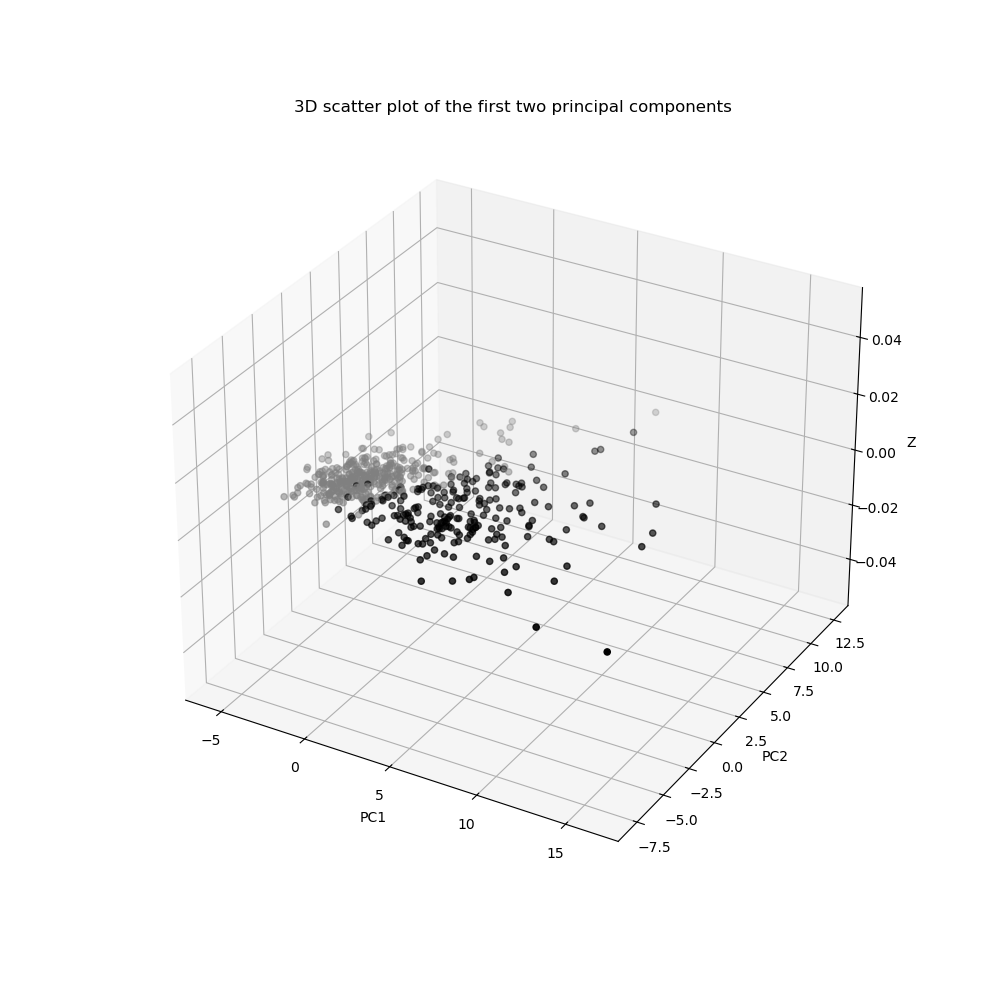

In [114]:
%matplotlib widget

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get data for the three principal components
x_data = pca_features_2[:, 0]
y_data = pca_features_2[:, 1]

# 3D scatter plot
ax.scatter(x_data, y_data, 0, c=y.map({'M': 'black', 'B': 'gray'}))

# # Add x, y and z axis lines as vectors
# ax.quiver(0, 0, 0, 10, 0, 0, color='black', arrow_length_ratio=0.1)
# ax.quiver(0, 0, 0, 0, 10, 0, color='black', arrow_length_ratio=0.1)

# Add title
ax.set_title('3D scatter plot of the first two principal components')

# Add labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Z')

plt.show()

#### **4°** **Sammon Projection**

* First we set the sammon function get from: 
> https://github.com/tompollard/sammon

In [115]:
def sammon(x, n, display = 2, inputdist = 'raw', maxhalves = 20, maxiter = 500, tolfun = 1e-9, init = 'default'):

    import numpy as np 
    from scipy.spatial.distance import cdist

    """Perform Sammon mapping on dataset x

    y = sammon(x) applies the Sammon nonlinear mapping procedure on
    multivariate data x, where each row represents a pattern and each column
    represents a feature.  On completion, y contains the corresponding
    co-ordinates of each point on the map.  By default, a two-dimensional
    map is created.  Note if x contains any duplicated rows, SAMMON will
    fail (ungracefully). 

    [y,E] = sammon(x) also returns the value of the cost function in E (i.e.
    the stress of the mapping).

    An N-dimensional output map is generated by y = sammon(x,n) .

    A set of optimisation options can be specified using optional
    arguments, y = sammon(x,n,[OPTS]):

       maxiter        - maximum number of iterations
       tolfun         - relative tolerance on objective function
       maxhalves      - maximum number of step halvings
       input          - {'raw','distance'} if set to 'distance', X is 
                        interpreted as a matrix of pairwise distances.
       display        - 0 to 2. 0 least verbose, 2 max verbose.
       init           - {'pca', 'cmdscale', random', 'default'}
                        default is 'pca' if input is 'raw', 
                        'msdcale' if input is 'distance'

    The default options are retrieved by calling sammon(x) with no
    parameters.

    File        : sammon.py
    Date        : 18 April 2014
    Authors     : Tom J. Pollard (tom.pollard.11@ucl.ac.uk)
                : Ported from MATLAB implementation by 
                  Gavin C. Cawley and Nicola L. C. Talbot

    Description : Simple python implementation of Sammon's non-linear
                  mapping algorithm [1].

    References  : [1] Sammon, John W. Jr., "A Nonlinear Mapping for Data
                  Structure Analysis", IEEE Transactions on Computers,
                  vol. C-18, no. 5, pp 401-409, May 1969.

    Copyright   : (c) Dr Gavin C. Cawley, November 2007.

    This program is free software; you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation; either version 2 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program; if not, write to the Free Software
    Foundation, Inc., 59 Temple Place, Suite 330, Boston, MA 02111-1307 USA

    """

    # Create distance matrix unless given by parameters
    if inputdist == 'distance':
        D = x
        if init == 'default':
            init = 'cmdscale'
    else:
        D = cdist(x, x)
        if init == 'default':
            init = 'pca'

    if inputdist == 'distance' and init == 'pca':
        raise ValueError("Cannot use init == 'pca' when inputdist == 'distance'")

    if np.count_nonzero(np.diagonal(D)) > 0:
        raise ValueError("The diagonal of the dissimilarity matrix must be zero")

    # Remaining initialisation
    N = x.shape[0]
    scale = 0.5 / D.sum()
    D = D + np.eye(N)     

    if np.count_nonzero(D<=0) > 0:
        raise ValueError("Off-diagonal dissimilarities must be strictly positive")   

    Dinv = 1 / D
    if init == 'pca':
        [UU,DD,_] = np.linalg.svd(x)
        y = UU[:,:n]*DD[:n] 
    elif init == 'cmdscale':
        from cmdscale import cmdscale
        y,e = cmdscale(D)
        y = y[:,:n]
    else:
        y = np.random.normal(0.0,1.0,[N,n])
    one = np.ones([N,n])
    d = cdist(y,y) + np.eye(N)
    dinv = 1. / d
    delta = D-d 
    E = ((delta**2)*Dinv).sum() 

    # Get on with it
    for i in range(maxiter):

        # Compute gradient, Hessian and search direction (note it is actually
        # 1/4 of the gradient and Hessian, but the step size is just the ratio
        # of the gradient and the diagonal of the Hessian so it doesn't
        # matter).
        delta = dinv - Dinv
        deltaone = np.dot(delta,one)
        g = np.dot(delta,y) - (y * deltaone)
        dinv3 = dinv ** 3
        y2 = y ** 2
        H = np.dot(dinv3,y2) - deltaone - np.dot(2,y) * np.dot(dinv3,y) + y2 * np.dot(dinv3,one)
        s = -g.flatten(order='F') / np.abs(H.flatten(order='F'))
        y_old    = y

        # Use step-halving procedure to ensure progress is made
        for j in range(maxhalves):
            s_reshape = np.reshape(s, (-1,n),order='F')
            y = y_old + s_reshape
            d = cdist(y, y) + np.eye(N)
            dinv = 1 / d
            delta = D - d
            E_new = ((delta**2)*Dinv).sum()
            if E_new < E:
                break
            else:
                s = 0.5*s

        # Bomb out if too many halving steps are required
        if j == maxhalves-1:
            print('Warning: maxhalves exceeded. Sammon mapping may not converge...')

        # Evaluate termination criterion
        if abs((E - E_new) / E) < tolfun:
            if display:
                print('TolFun exceeded: Optimisation terminated')
            break

        # Report progress
        E = E_new
        if display > 1:
            print('epoch = %d : E = %12.10f'% (i+1, E * scale))

    if i == maxiter-1:
        print('Warning: maxiter exceeded. Sammon mapping may not have converged...')

    # Fiddle stress to match the original Sammon paper
    E = E * scale
    
    return [y,E]

##### **a) & b)** Perform Sammon Projection for 3 dimensions

epoch = 1 : E = 0.0294392951
epoch = 2 : E = 0.0256714460
epoch = 3 : E = 0.0253265411
epoch = 4 : E = 0.0252761779
epoch = 5 : E = 0.0246724729
epoch = 6 : E = 0.0236163003
epoch = 7 : E = 0.0231390740
epoch = 8 : E = 0.0215806550
epoch = 9 : E = 0.0212102997
epoch = 10 : E = 0.0199767454
epoch = 11 : E = 0.0199450734
epoch = 12 : E = 0.0192489728
epoch = 13 : E = 0.0150658739
epoch = 14 : E = 0.0109181899
epoch = 15 : E = 0.0105686268
epoch = 16 : E = 0.0102982342
epoch = 17 : E = 0.0101826513
epoch = 18 : E = 0.0099318114
epoch = 19 : E = 0.0097576160
epoch = 20 : E = 0.0094184802
epoch = 21 : E = 0.0090944963
epoch = 22 : E = 0.0090610720
epoch = 23 : E = 0.0089433967
epoch = 24 : E = 0.0089393484
epoch = 25 : E = 0.0089062661
epoch = 26 : E = 0.0087930901
epoch = 27 : E = 0.0087546514
epoch = 28 : E = 0.0087258740
epoch = 29 : E = 0.0087087543
epoch = 30 : E = 0.0087084747
epoch = 31 : E = 0.0086904100
epoch = 32 : E = 0.0086759611
epoch = 33 : E = 0.0086676153
epoch = 34 : E = 0.

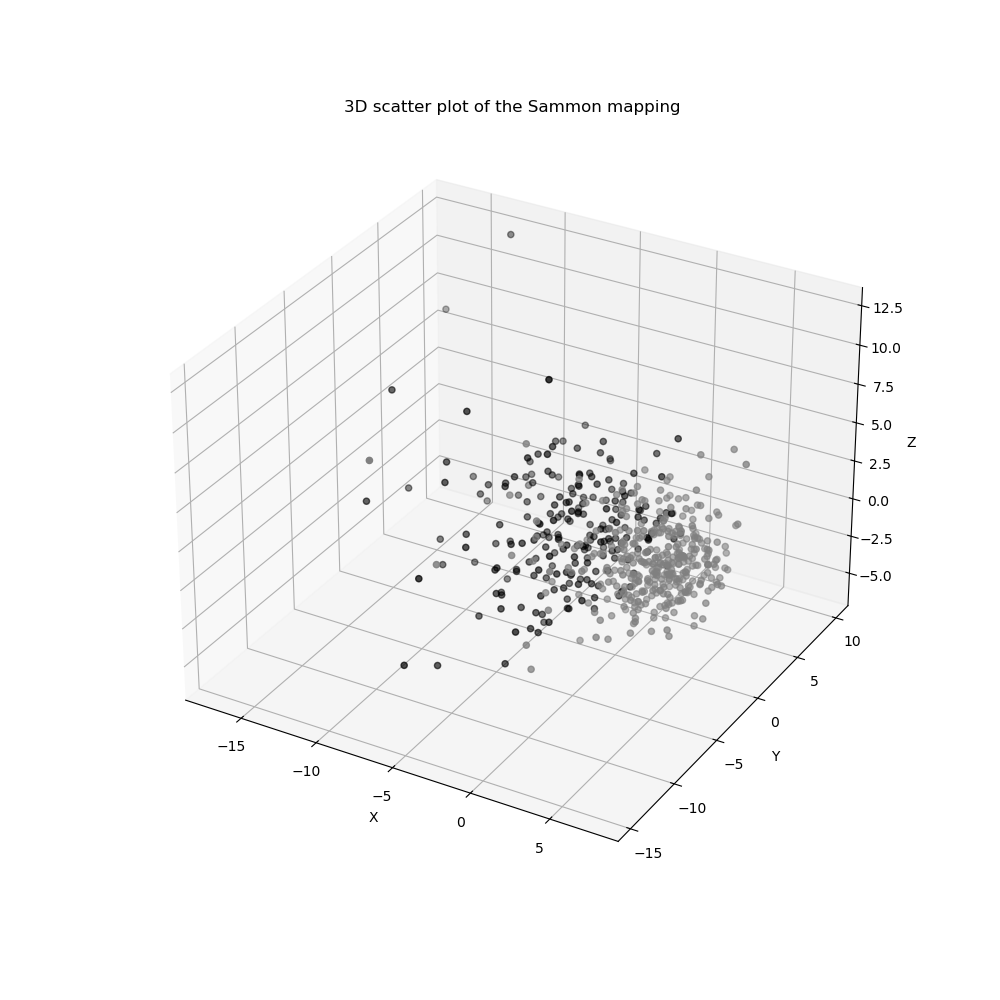

In [ ]:
%matplotlib widget

y_sammon, E = sammon(x, 3)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get data for the three principal components
x_data_sammon = y_sammon[:, 0]
y_data_sammon = y_sammon[:, 1]
z_data_sammon = y_sammon[:, 2]

# 3D scatter plot
ax.scatter(x_data_sammon, y_data_sammon, z_data_sammon, c=y.map({'M': 'black', 'B': 'gray'}))

# Add x, y and z axis lines as vectors
# ax.quiver(0, 0, 0, 10, 0, 0, color='black', arrow_length_ratio=0.1)
# ax.quiver(0, 0, 0, 0, 10, 0, color='black', arrow_length_ratio=0.1)
# ax.quiver(0, 0, 0, 0, 0, 10, color='black', arrow_length_ratio=0.1)

# Add title
ax.set_title('3D scatter plot of the Sammon mapping')

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

##### **c) & d)** Perform Sammon using PCA features

epoch = 1 : E = 0.0246907922
epoch = 2 : E = 0.0243957286
epoch = 3 : E = 0.0243542669
epoch = 4 : E = 0.0241328197
epoch = 5 : E = 0.0241135846
epoch = 6 : E = 0.0200995086
epoch = 7 : E = 0.0200825176
epoch = 8 : E = 0.0200278838
epoch = 9 : E = 0.0193521658
epoch = 10 : E = 0.0189224243
epoch = 11 : E = 0.0173182748
epoch = 12 : E = 0.0170342316
epoch = 13 : E = 0.0168683355
epoch = 14 : E = 0.0159357542
epoch = 15 : E = 0.0150521645
epoch = 16 : E = 0.0132697065
epoch = 17 : E = 0.0129412310
epoch = 18 : E = 0.0096488321
epoch = 19 : E = 0.0093961468
epoch = 20 : E = 0.0091111778
epoch = 21 : E = 0.0086240059
epoch = 22 : E = 0.0083964305
epoch = 23 : E = 0.0079388190
epoch = 24 : E = 0.0077999202
epoch = 25 : E = 0.0077101460
epoch = 26 : E = 0.0076740125
epoch = 27 : E = 0.0076518855
epoch = 28 : E = 0.0076350157
epoch = 29 : E = 0.0075756523
epoch = 30 : E = 0.0075745930
epoch = 31 : E = 0.0075355164
epoch = 32 : E = 0.0075299936
epoch = 33 : E = 0.0075210698
epoch = 34 : E = 0.

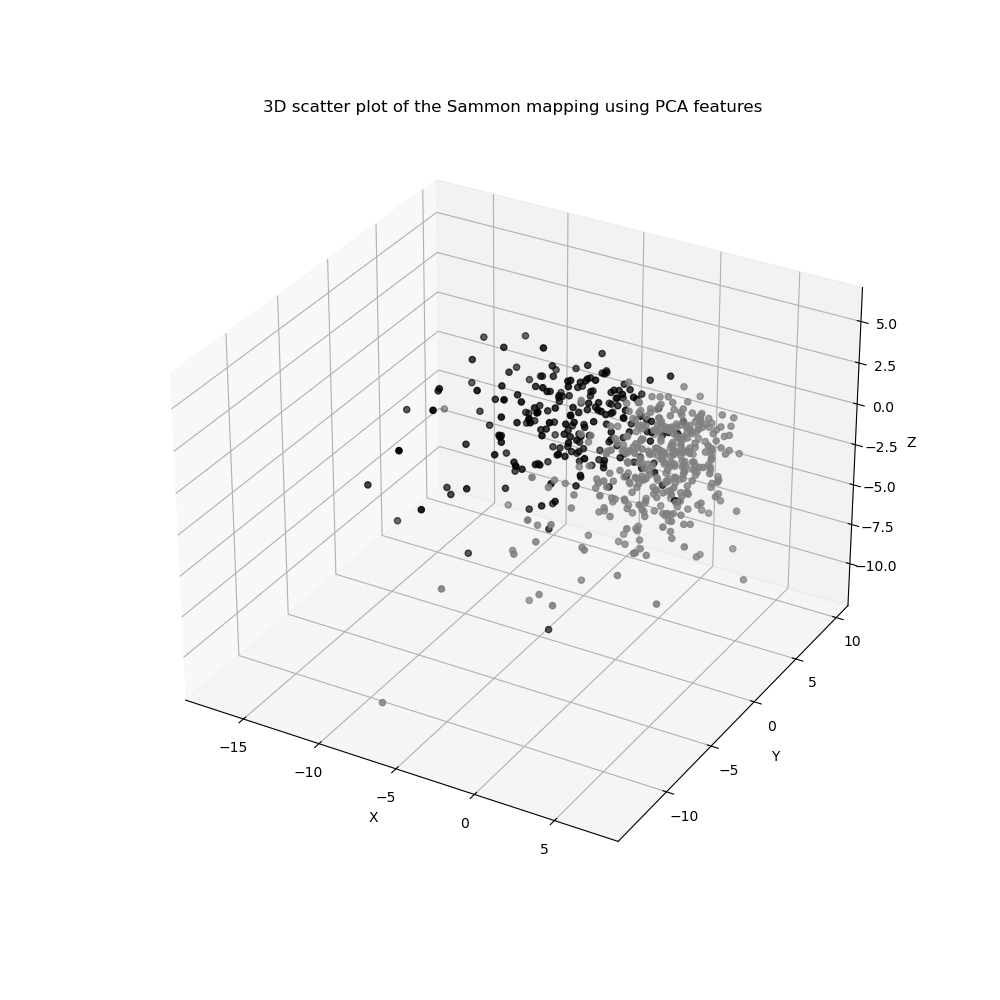

In [ ]:
%matplotlib widget

y_sammon_pca, E_pca = sammon(pca_features_10, 3)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get data for the three principal components
x_data_sammon_pca = y_sammon_pca[:, 0]
y_data_sammon_pca = y_sammon_pca[:, 1]
z_data_sammon_pca = y_sammon_pca[:, 2]

# 3D scatter plot
ax.scatter(x_data_sammon_pca, y_data_sammon_pca, z_data_sammon_pca, c=y.map({'M': 'black', 'B': 'gray'}))

# Add x, y and z axis lines as vectors
# ax.quiver(0, 0, 0, 10, 0, 0, color='black', arrow_length_ratio=0.1)
# ax.quiver(0, 0, 0, 0, 10, 0, color='black', arrow_length_ratio=0.1)
# ax.quiver(0, 0, 0, 0, 0, 10, color='black', arrow_length_ratio=0.1)

# Add title
ax.set_title('3D scatter plot of the Sammon mapping using PCA features')

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

#### **5°** **Autoencoder**

* Get data as **x** and **y** (already set on previous steps)

* Split on train and test data

In [118]:
# Split the data into training and testing sets
train, test = train_test_split(wdbc_standardized, test_size=0.2, random_state=0, shuffle=True)

# Separate the features and target
x_train = train.drop('Diagnosis', axis=1)
y_train = train['Diagnosis']

x_test = test.drop('Diagnosis', axis=1)
y_test = test['Diagnosis']

* Building the autoencoder

In [119]:
# Define input dimension
input_dim = x_train.shape[1]

# This is the dimension of the latent space (encoding space)
latent_dim = 3

# Define the encoder
encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim, activation='relu')
])

# Define the decoder
decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
    Dense(128, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

# Create the autoencoder model
autoencoder_input = Input(shape=(input_dim,))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = Model(inputs=autoencoder_input, outputs=decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* Plot how the data is before the training

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


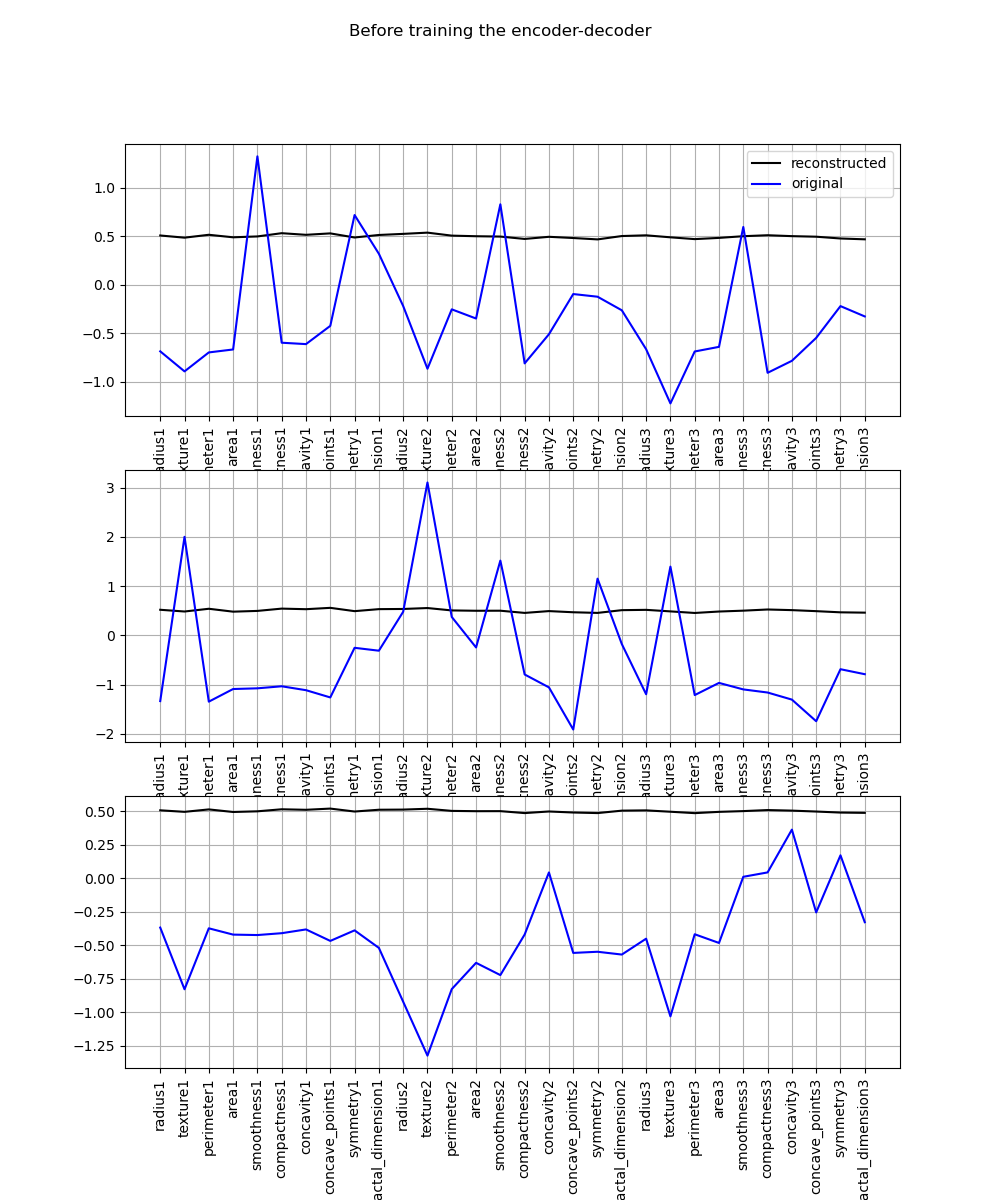

In [120]:
# Get all the metric names (column names)
metric_names = wdbc_standardized.columns[1:]

def plot_orig_vs_recon(title='', n_samples=3):
    # Set the figure size
    fig = plt.figure(figsize=(10,12))
    # Set the title
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        # Select a random sample
        idx = random.sample(range(x_train.shape[0]), 1)[0]
        # Plot the original and reconstructed data
        plt.plot(autoencoder.predict(x_train.iloc[[idx]]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(x_train.iloc[[idx]].squeeze(), color='blue', label='original' if i == 0 else '')
        # add x ticks and labels
        fig.axes[i].set_xticks(np.arange(len(metric_names)))
        fig.axes[i].set_xticklabels(metric_names)
        plt.xticks(rotation=90)
        plt.grid(True)
        if i == 0: plt.legend()
    plt.show()

plot_orig_vs_recon('Before training the encoder-decoder')

* Training the autoencoder

In [121]:
model_history = autoencoder.fit(x_train, x_train, epochs=5000, batch_size=32, verbose=0)

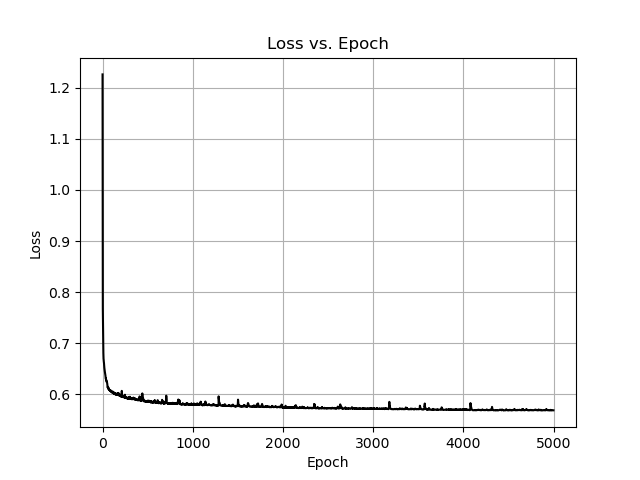

In [122]:
# Clear the current figure and axes
plt.clf()
plt.cla()
plt.close('all')

# Plot the loss vs. epoch
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)
plt.show()

* Plot after the training

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


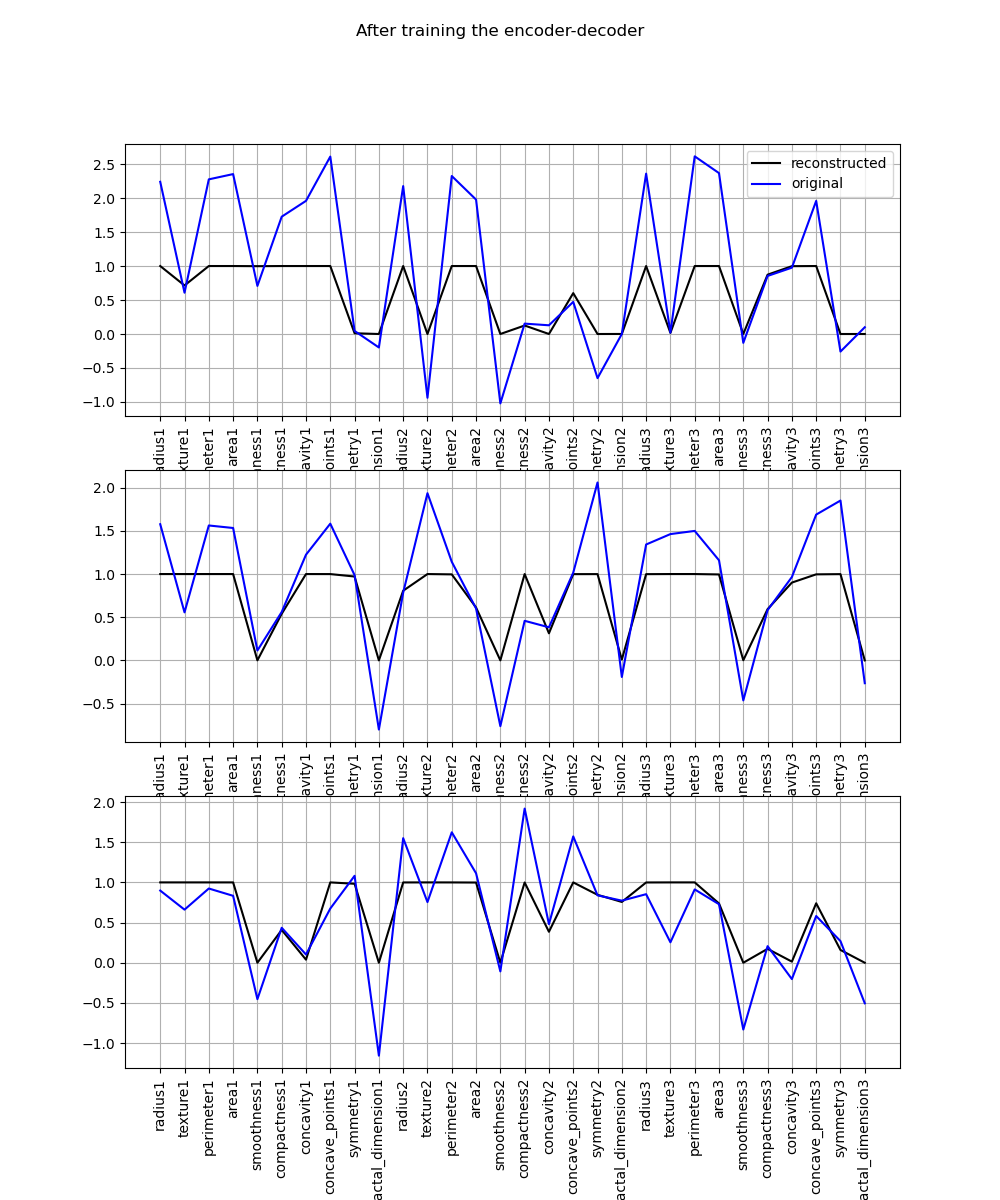

In [124]:
plot_orig_vs_recon('After training the encoder-decoder')

* Plot 3D values

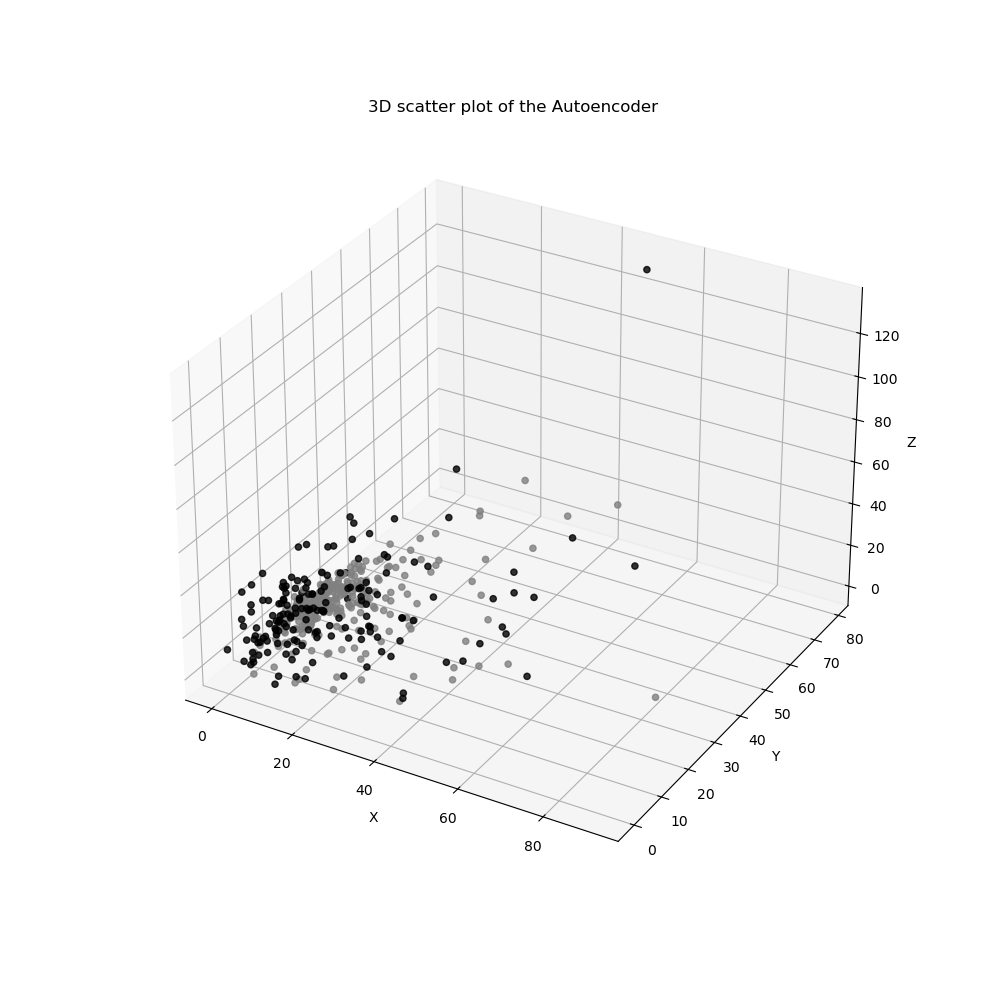

In [125]:
%matplotlib widget

# Encode the training data
encoded_x_train = encoder(x_train)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get data for the three principal components
ax.scatter(encoded_x_train[:, 0], encoded_x_train[:, 1], encoded_x_train[:, 2], alpha=.8, c=y_train.map({'M': 'black', 'B': 'gray'}))

# Add title
ax.set_title('3D scatter plot of the Autoencoder')

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()